In [1]:
import pickle
import pandas as pd
from helpermodules.correlation_study import CorrelationAnalysis

# Load the pickle file
with open('data/pickle_files/cleaned_nasdaq_dataframe.pkl', 'rb') as file:
    df = pickle.load(file)



In [2]:

# Get list of tickers from DataFrame columns
tickers = df.columns.tolist()
# Exclude the ticker 'GOOG' from the tickers list
tickers.remove('GOOG')
# Drop the 'GOOG' column from the DataFrame
df = df.drop(columns=['GOOG'])

In [3]:
#make stationary

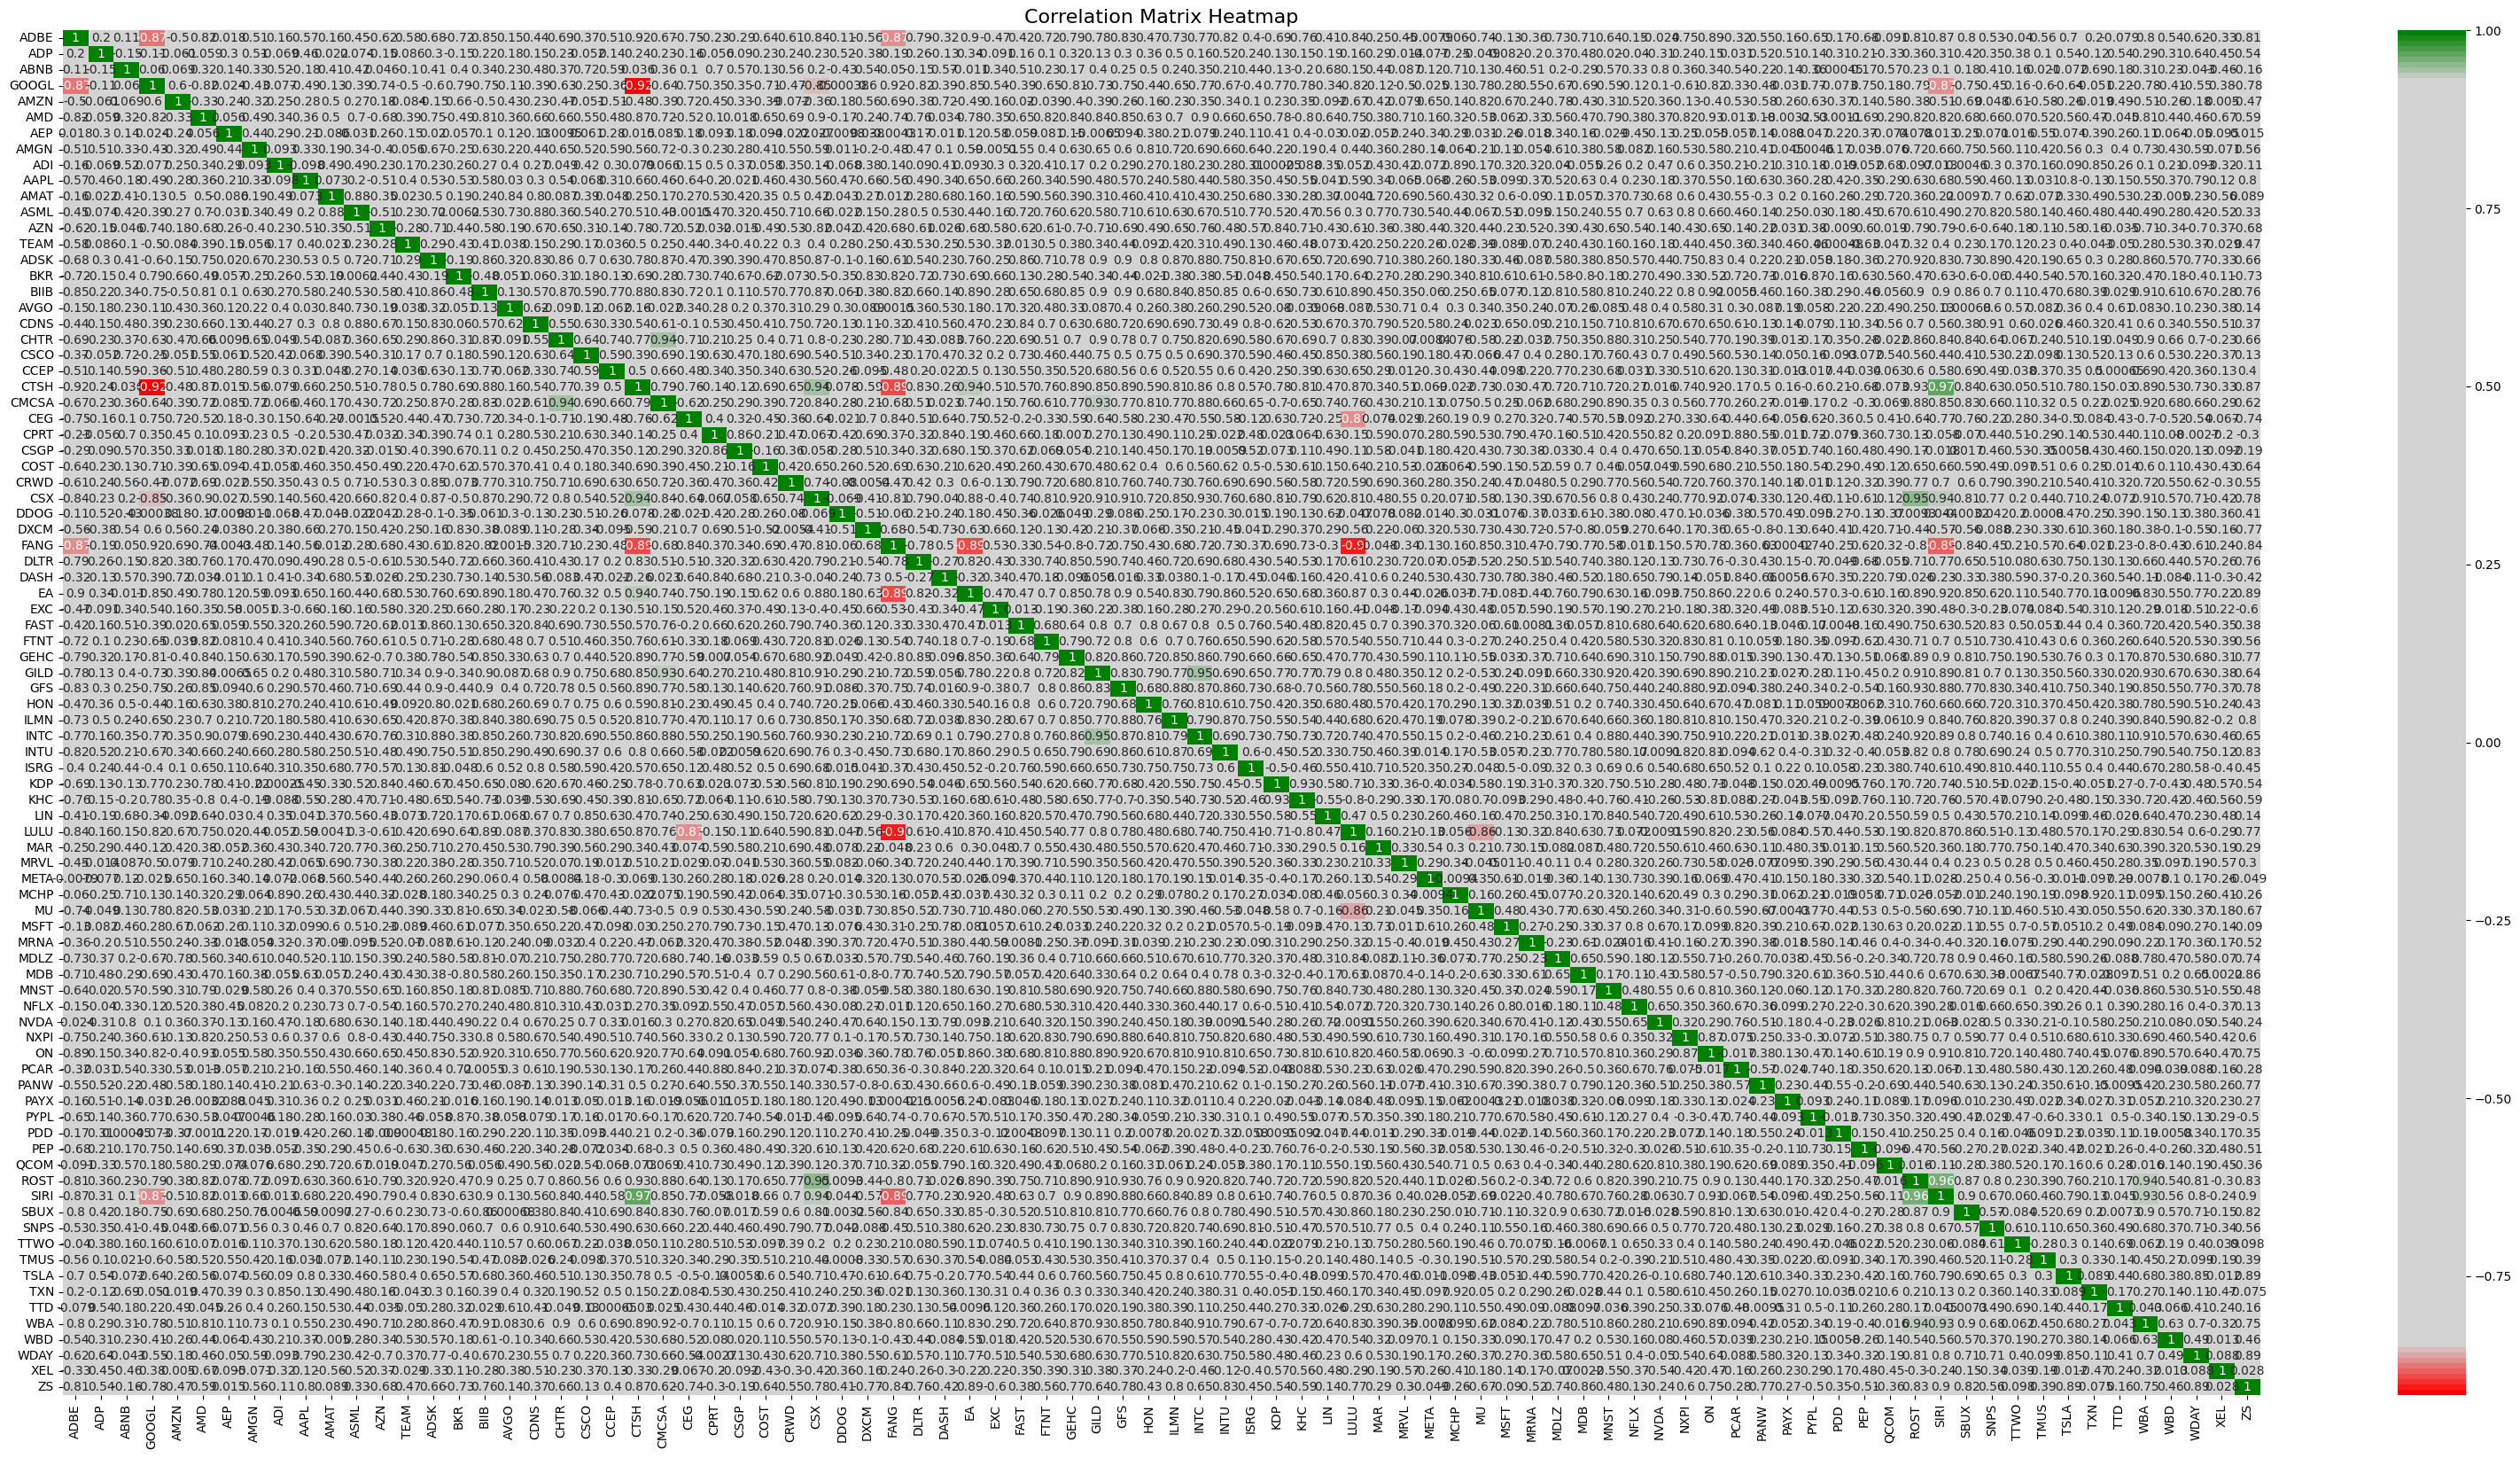

Most correlated pair: ['CTSH', 'SIRI'] with correlation: 0.9679947326234023
Most correlated pair: ['CTSH', 'SIRI']


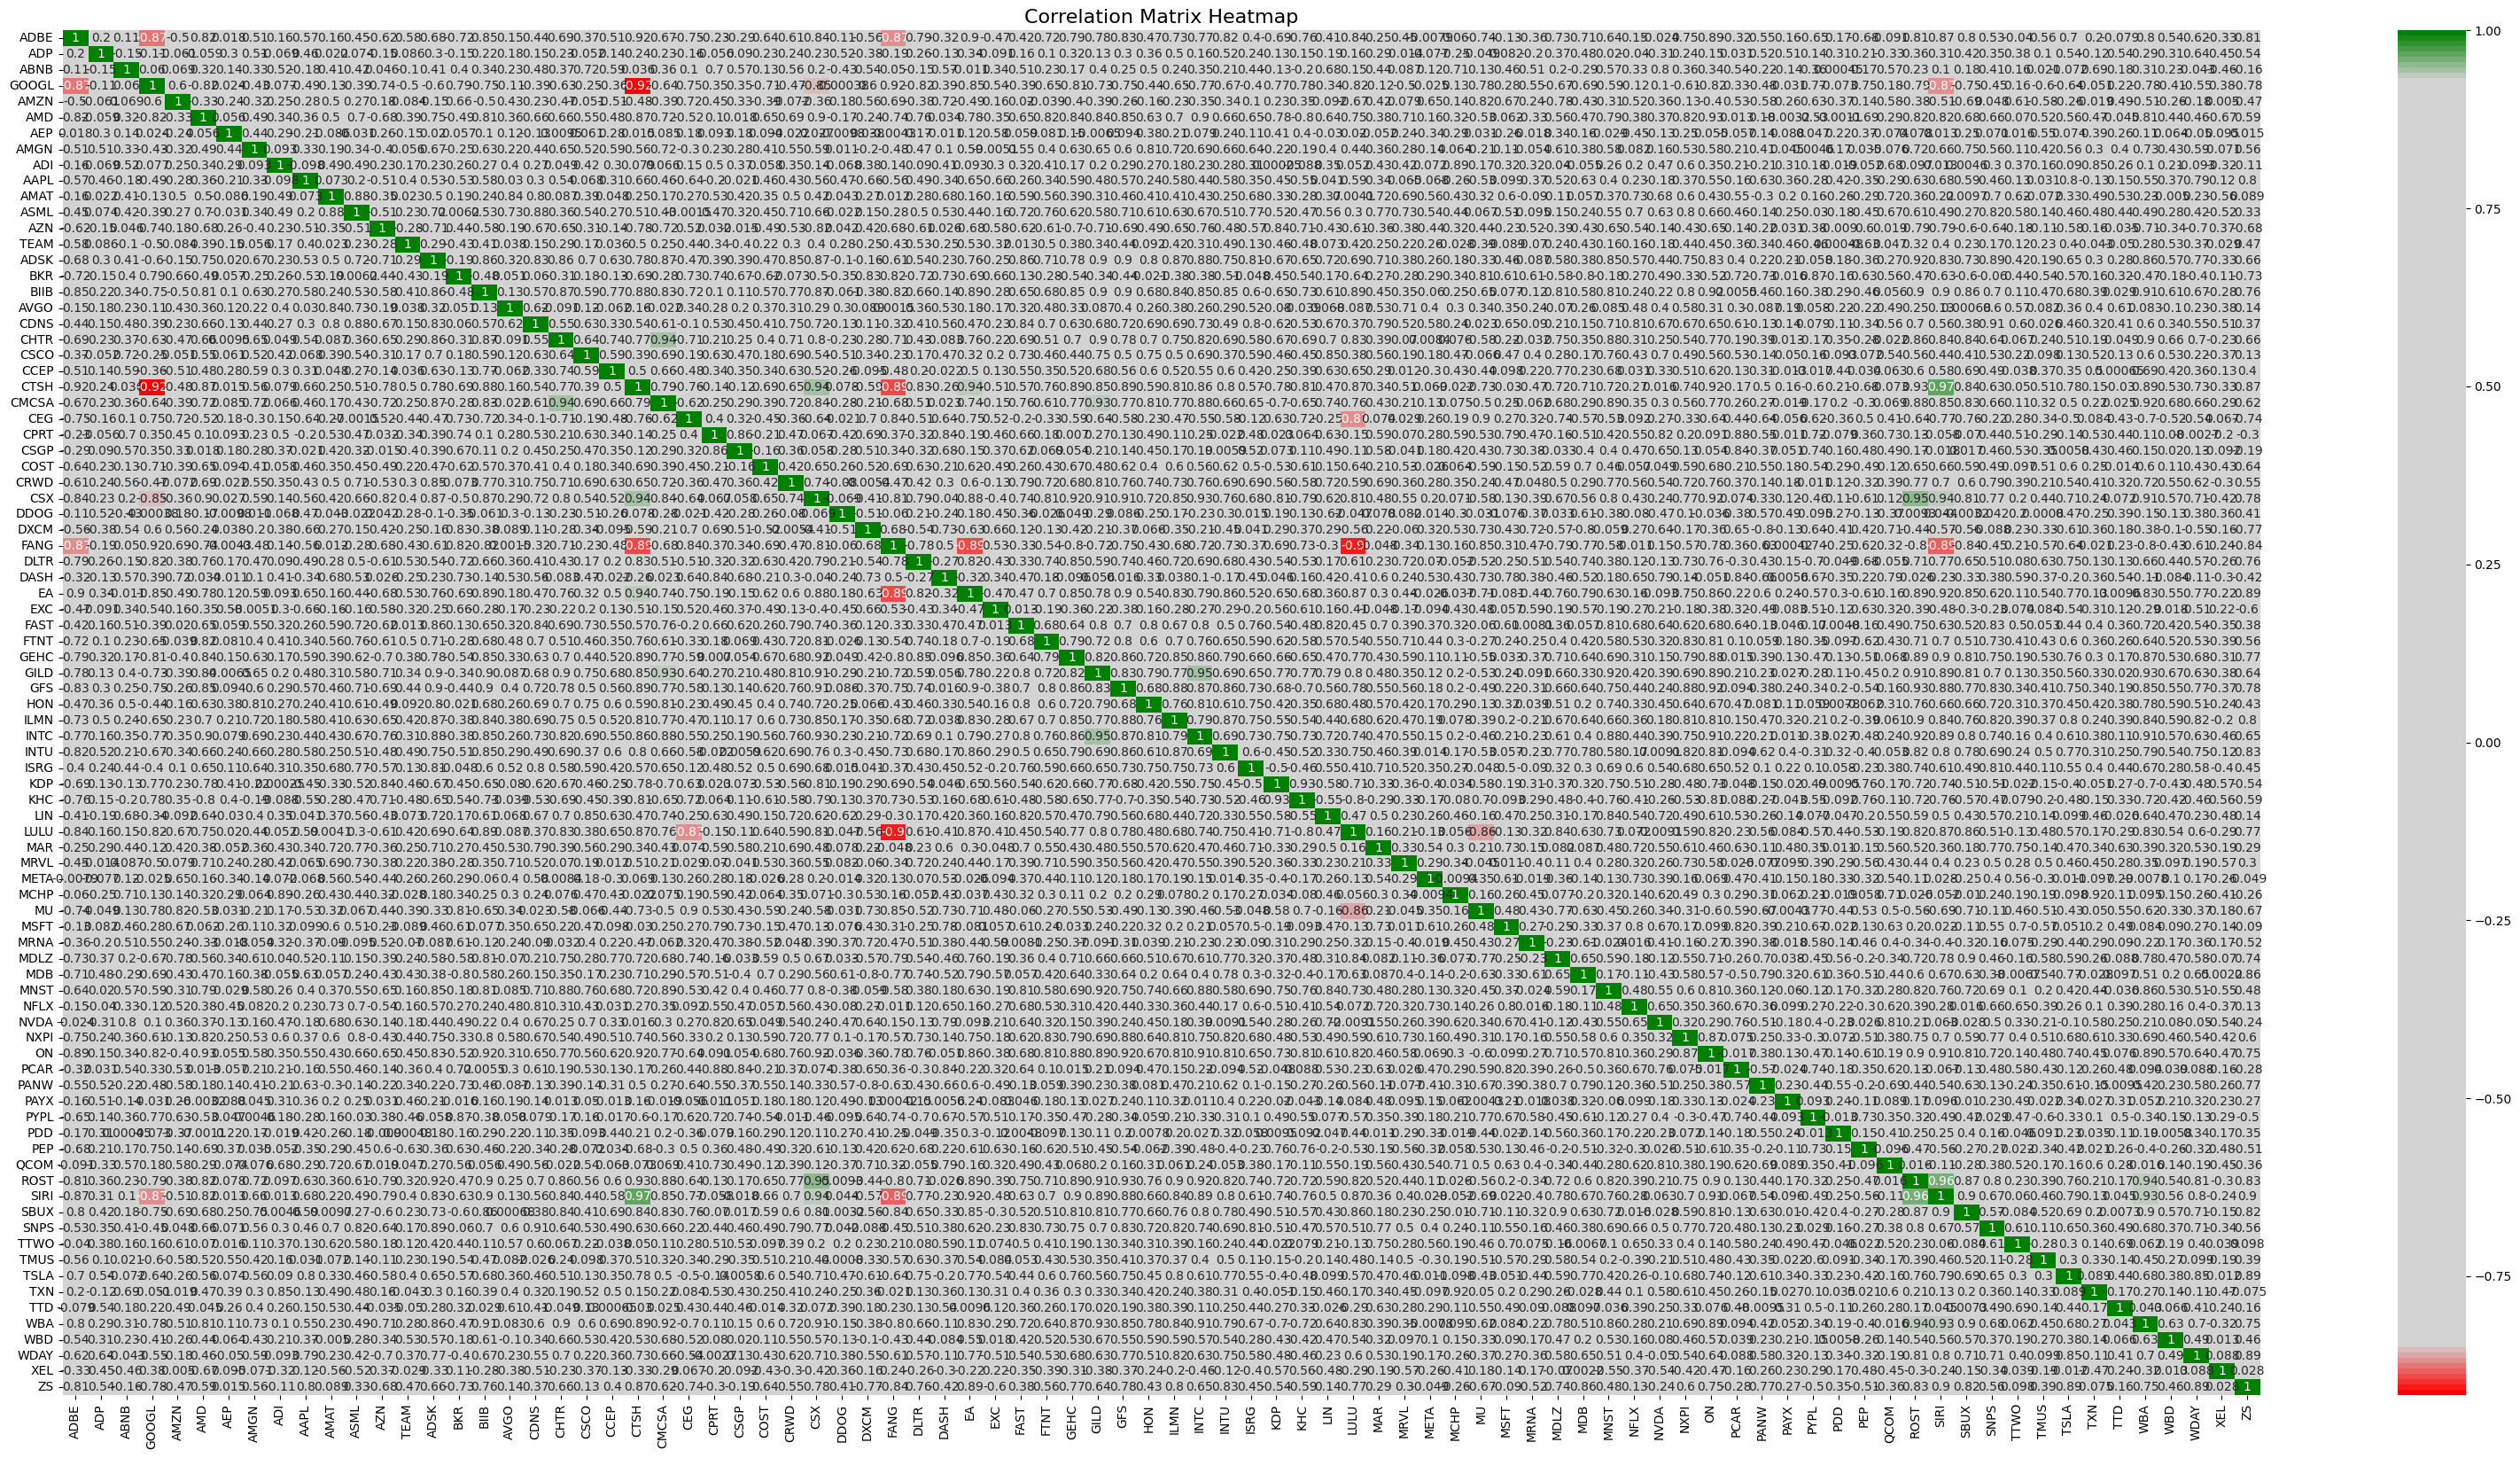

Most correlated pair: ['CTSH', 'SIRI'] with correlation: 0.9679947326234023
Pickle file saved for the final dataframe: final_dataframe.pkl

DataFrame with rolling correlation:
                      CTSH  correlation    SIRI  correlation
2024-02-26 09:45:00  78.93          NaN  4.5735          NaN
2024-02-26 09:46:00  78.93          NaN  4.5735          NaN
2024-02-26 09:47:00  78.93          NaN  4.5735          NaN
2024-02-26 09:48:00  78.93          NaN  4.5735          NaN
2024-02-26 09:49:00  78.93          NaN  4.5735          NaN


c:\Users\giuli\Repositories\nasdaq_causal-analysis_lstm\helpermodules\correlation_study.py:282: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_stock1['correlation'] = df_stock1['correlation'].fillna(method=fillna_method)
c:\Users\giuli\Repositories\nasdaq_causal-analysis_lstm\helpermodules\correlation_study.py:283: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_stock2['correlation'] = df_stock2['correlation'].fillna(method=fillna_method)


In [4]:
# Initialize CorrelationAnalysis with DataFrame and tickers
correlation_analyzer = CorrelationAnalysis(df, tickers)

# Find the most correlated pair
# This will also save correlation results and create visualizations
most_correlated_pair = correlation_analyzer.top3_corrstocks()

print(f"Most correlated pair: {most_correlated_pair}")

# Optional: If you want to get the rolling correlation analysis for this pair
df_with_correlation = correlation_analyzer.winner_rollingcorrelation()

# Print first few rows of the combined DataFrame with correlation
print("\nDataFrame with rolling correlation:")
print(df_with_correlation.head())

In [5]:
# Load the pickle file
with open('data/pickle_files/final_dataframe.pkl', 'rb') as file:
    final_df = pickle.load(file)

# Display the information of the DataFrame
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17432 entries, 2024-02-26 09:45:00 to 2024-02-26 15:25:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CTSH         17432 non-null  float64
 1   correlation  17101 non-null  float64
 2   SIRI         17432 non-null  float64
 3   correlation  17101 non-null  float64
dtypes: float64(4)
memory usage: 680.9 KB


In [6]:
# Drop one of the 'correlation' columns from final_df
final_df = final_df.loc[:, ~final_df.columns.duplicated()]

In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17432 entries, 2024-02-26 09:45:00 to 2024-02-26 15:25:00
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CTSH         17432 non-null  float64
 1   correlation  17101 non-null  float64
 2   SIRI         17432 non-null  float64
dtypes: float64(3)
memory usage: 544.8 KB


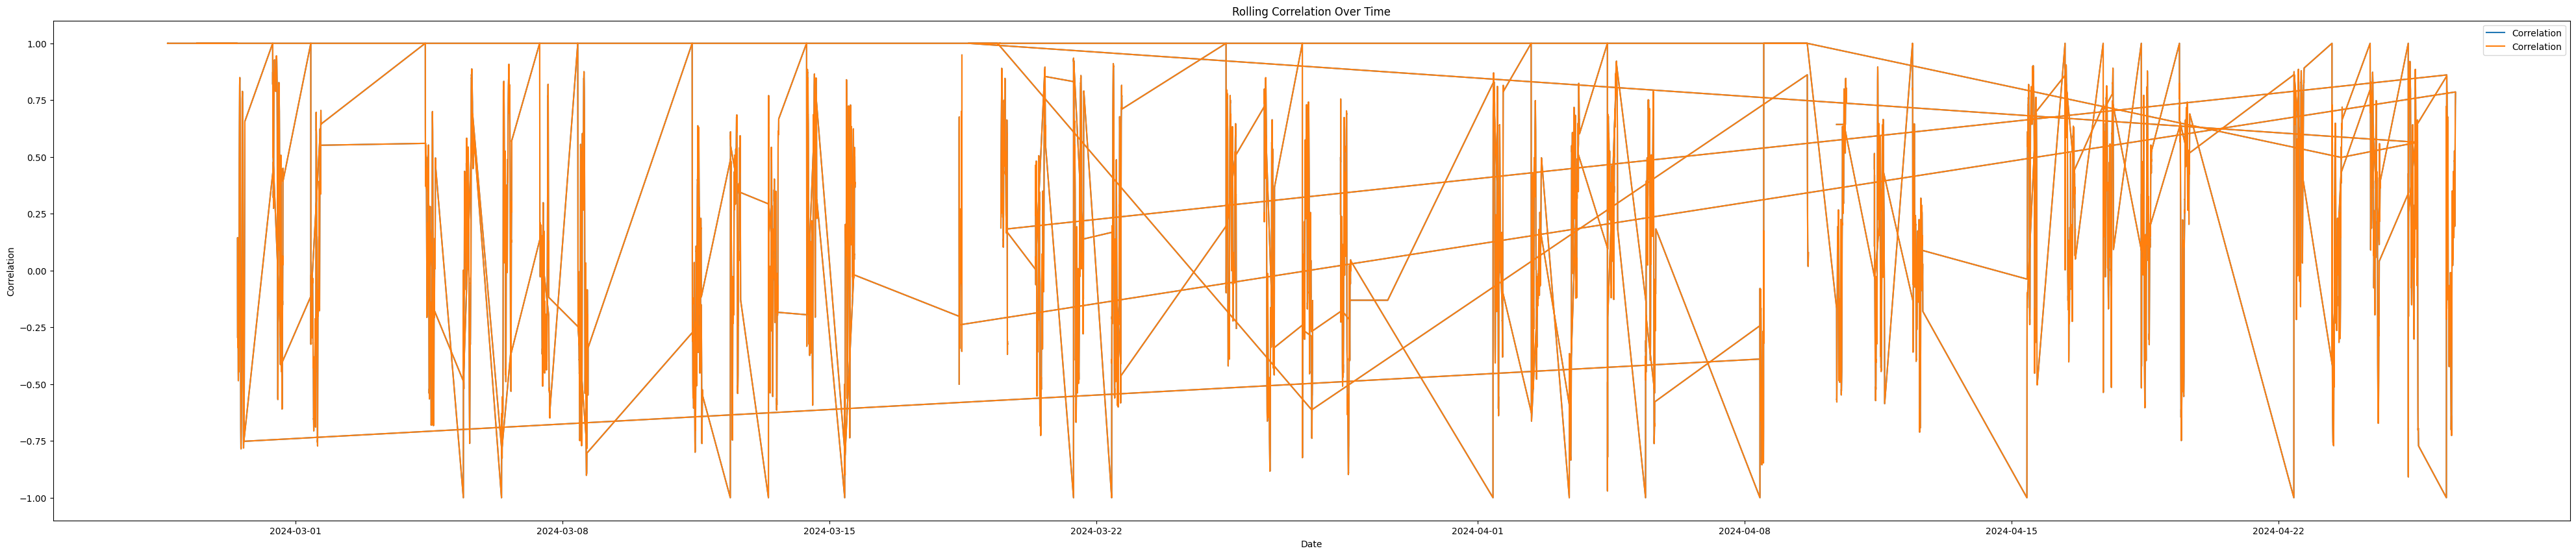

In [8]:
import matplotlib.pyplot as plt

# Plot the correlation column
plt.figure(figsize=(50, 10))
plt.plot(df_with_correlation.index, df_with_correlation['correlation'], label='Correlation')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.title('Rolling Correlation Over Time')
plt.legend()
plt.show()

In [9]:
import pandas as pd
from helpermodules.granger_causality import GrangerCausalityAnalysis
import matplotlib.pyplot as plt

# Forward fill missing values
final_df = final_df.bfill()

# Initialize GrangerCausalityAnalysis with the DataFrame
granger_analyzer = GrangerCausalityAnalysis(final_df)


In [10]:
import numpy as np
print(final_df.isna().sum())  # Check missing values per column
print(final_df[~final_df.applymap(np.isfinite)].count())  # Check infinite values


CTSH           0
correlation    0
SIRI           0
dtype: int64
CTSH             0
correlation    320
SIRI             0
dtype: int64


C:\Users\giuli\AppData\Local\Temp\ipykernel_3108\36432331.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(final_df[~final_df.applymap(np.isfinite)].count())  # Check infinite values


In [11]:
import numpy as np
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)
final_df = final_df.ffill().bfill()


In [12]:
import numpy as np
print(final_df.isna().sum())  # Check missing values per column
print(final_df[~final_df.applymap(np.isfinite)].count())  # Check infinite values



CTSH           0
correlation    0
SIRI           0
dtype: int64
CTSH           0
correlation    0
SIRI           0
dtype: int64


C:\Users\giuli\AppData\Local\Temp\ipykernel_3108\2344617545.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(final_df[~final_df.applymap(np.isfinite)].count())  # Check infinite values


c:\Users\giuli\Repositories\nasdaq_causal-analysis_lstm\helpermodules\granger_causality.py:52: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = self.dataframe[[ticker_x, ticker_y]].fillna(method='ffill').fillna(method='bfill')
c:\Users\giuli\Repositories\nasdaq_causal-analysis_lstm\venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\giuli\Repositories\nasdaq_causal-analysis_lstm\helpermodules\granger_causality.py:52: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = self.dataframe[[ticker_x, ticker_y]].fillna(method='ffill').fillna(method='bfill')
c:\Users\giuli\Repositories\nasdaq_causal-analysis_lstm\venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is depre

correlation Granger-causes CTSH with p-values [np.float64(0.8201630368123843), np.float64(7.086766661224289e-05), np.float64(2.397332235789744e-06), np.float64(1.9053797647623287e-06), np.float64(9.25743873637318e-06)]
correlation Granger-causes SIRI with p-values [np.float64(0.8324723630305106), np.float64(7.819002877807702e-13), np.float64(5.367941329219652e-16), np.float64(4.083788033849803e-16), np.float64(2.6388133585056266e-15)]
SIRI Granger-causes CTSH with p-values [np.float64(0.02962712950072114), np.float64(9.70776403595881e-05), np.float64(7.950420314670808e-05), np.float64(4.005317067587678e-05), np.float64(0.00011048693363456907)]


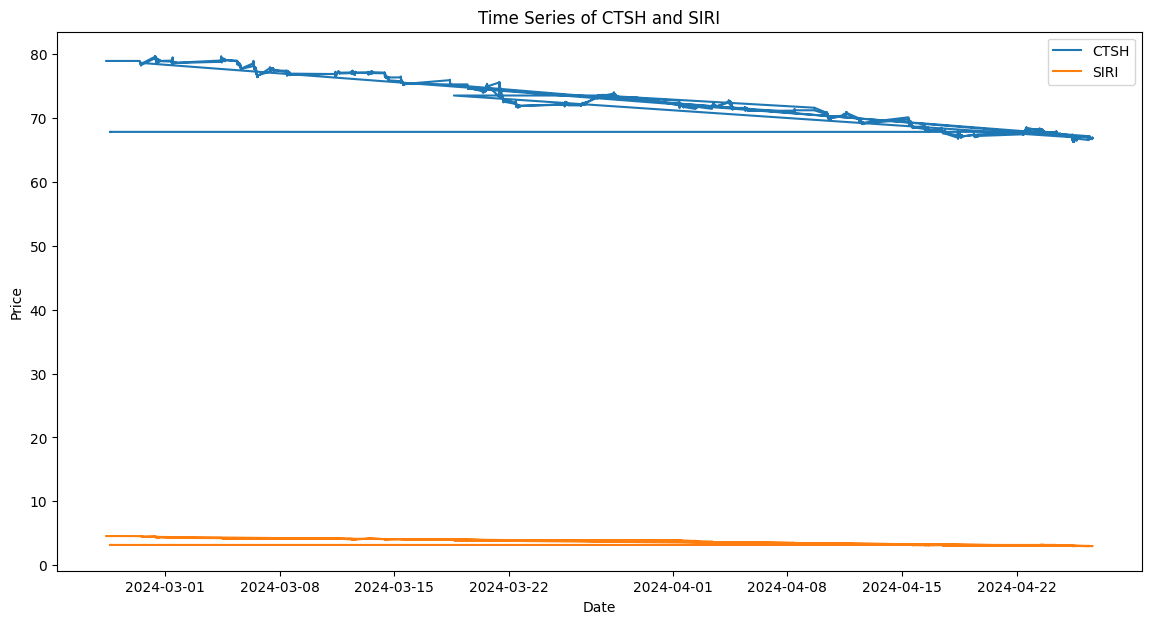

In [13]:

# Calculate Granger causality
granger_results = granger_analyzer.calculate_granger_causality()

# Print significant causality pairs
significant_pairs = granger_analyzer.significant_causality_pairs()

# Plot the two time series over time
ticker_x, ticker_y = most_correlated_pair
plt.figure(figsize=(14, 7))
plt.plot(df.index, df[ticker_x], label=ticker_x)
plt.plot(df.index, df[ticker_y], label=ticker_y)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Time Series of {ticker_x} and {ticker_y}')
plt.legend()
plt.show()

 SIRI strongly Granger-causes CTSH

In [14]:
# Load the pickle file
with open('data/pickle_files/Linear_Granger_Casuality_Significants.pkl', 'rb') as file:
    Linear_Granger_Casuality_Significants = pickle.load(file)

# Display the content of the loaded pickle file
print(Linear_Granger_Casuality_Significants)

[('correlation', 'CTSH'), ('correlation', 'SIRI'), ('SIRI', 'CTSH')]


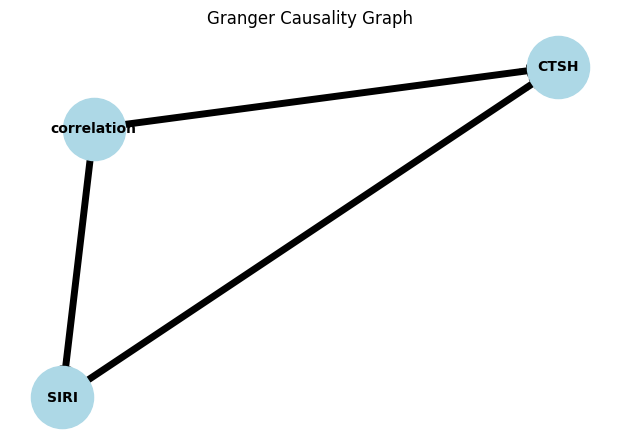

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Define causality relationships with p-values
causal_relationships = {
    ("correlation", "CTSH"): 1.9e-6,  # Smaller p-value means stronger causality
    ("correlation", "SIRI"): 4.0e-16,
    ("SIRI", "CTSH"): 0.00004
}

# Create a directed graph
G = nx.DiGraph()

# Add edges with weight based on significance (thicker edges for stronger causality)
for (cause, effect), p_value in causal_relationships.items():
    weight = max(0.5, 5 * (1 - p_value))  # Adjust weight scaling
    G.add_edge(cause, effect, weight=weight)

# Draw the graph
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G, seed=42)  # Position nodes for better visualization
edges = G.edges(data=True)

nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray")
nx.draw_networkx_edges(G, pos, width=[d["weight"] for _, _, d in edges], arrowstyle="->", arrowsize=15)

plt.title("Granger Causality Graph")
plt.show()
